# Network Clustering - Lab

## Introduction

In this lab you'll practice your clustering and visualization skills to investigate stackoverflow! Specifically, the dataset you'll be investigating examines tags on stackoverflow. With this, you should be able to explore some of the related technologies currently in use by developers.

## Objectives
You will be able to:

* Implement network clustering with k-clique clustering
* Implement network clustering with the Girvan-Newman algorithm
* Visualize clusters

## Load the Dataset

Load the dataset from the `stack-overflow-tag-network/stack_network_links.csv` file. For now, simply load the file as a standard pandas DataFrame.

In [1]:
#Your code here
import pandas as pd

df = pd.read_csv('stack-overflow-tag-network/stack_network_links.csv')
df.head()

source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925

## Transform the Dataset into a Network Graph using NetworkX

Transform the dataset from a Pandas DataFrame into a NetworkX graph.

In [2]:
#Your code here
import networkx as nx

G = nx.Graph()
for row in df.index:
    source = df.source[row]
    target = df.target[row]
    weight = df.value[row]
    G.add_edge(source, target, weight=weight)
print(len(G.nodes))

115


## Create an Initial Graph Visualization

Next, create an initial visualization of the network.

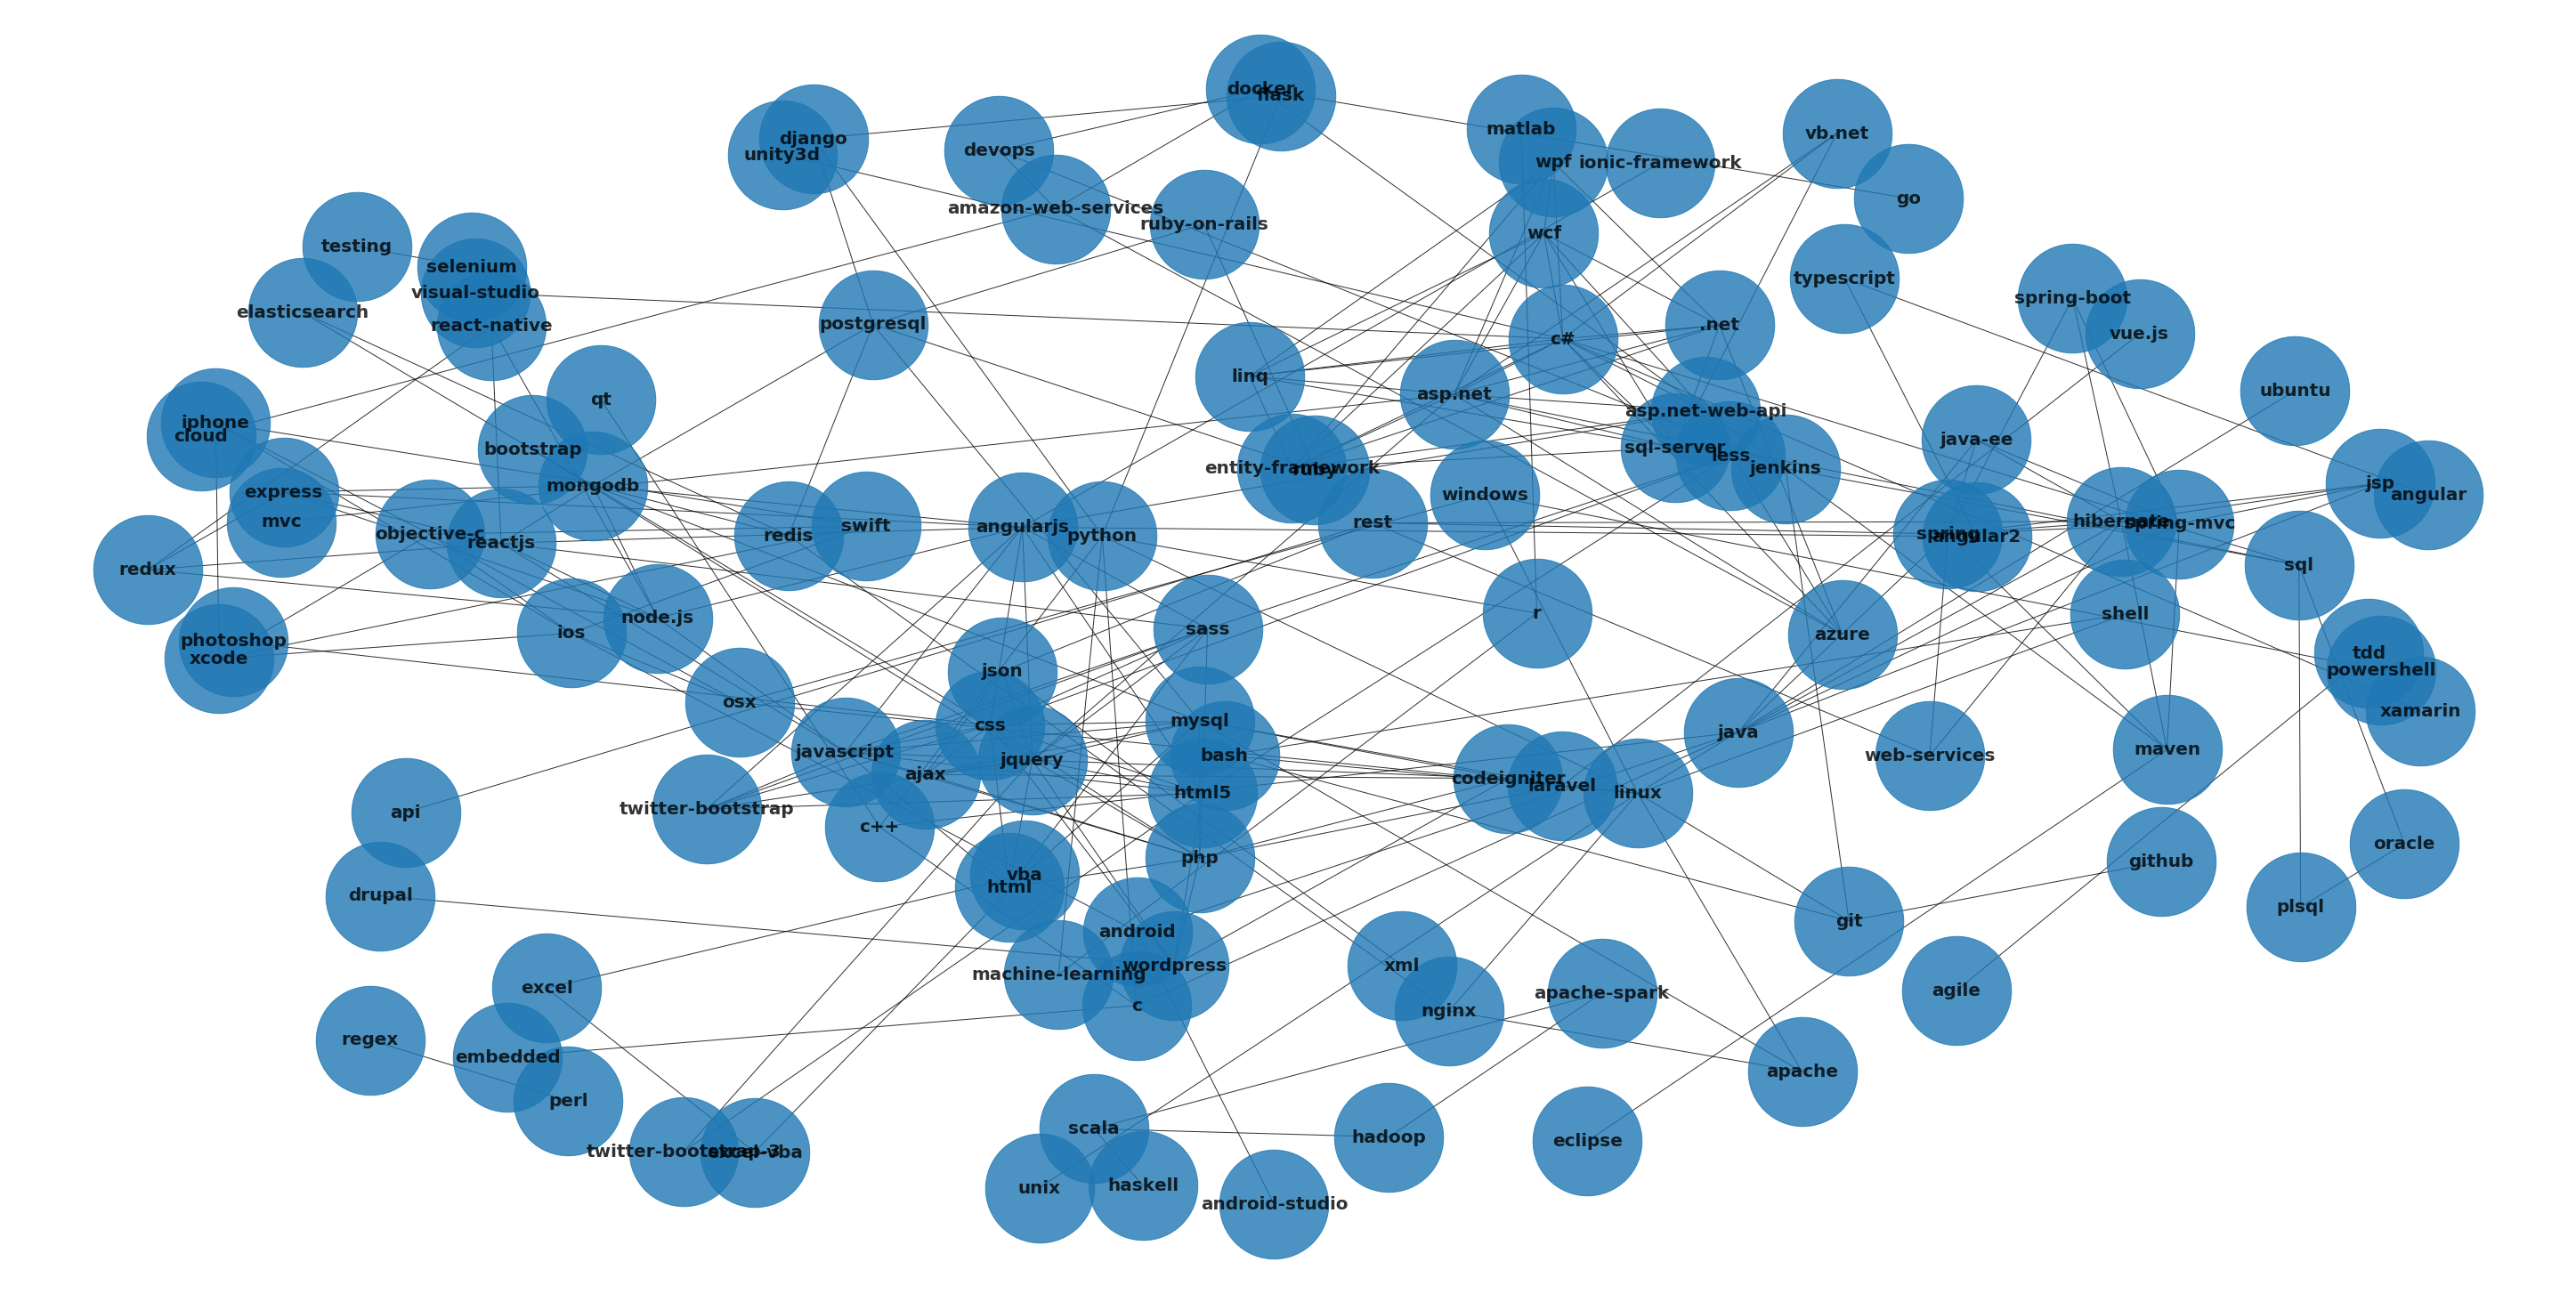

In [5]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40, 20))
nx.draw(G, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True, alpha=0.8, node_size=15000, font_weight="bold", 
        font_size=20)

## Perform an Initial Clustering using k-clique Clustering

Begin to explore the impact of using different values of k.

In [6]:
#Your code here
for i in range(2, 10):
    kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=i))
    print("Clusters with k={}: {}".format(i, len(kc_clusters)))

Clusters with k=2: 6
Clusters with k=3: 16
Clusters with k=4: 5
Clusters with k=5: 5
Clusters with k=6: 3
Clusters with k=7: 2
Clusters with k=8: 0
Clusters with k=9: 0


## Visualize The Clusters Produced from the K-Clique Algorithm

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

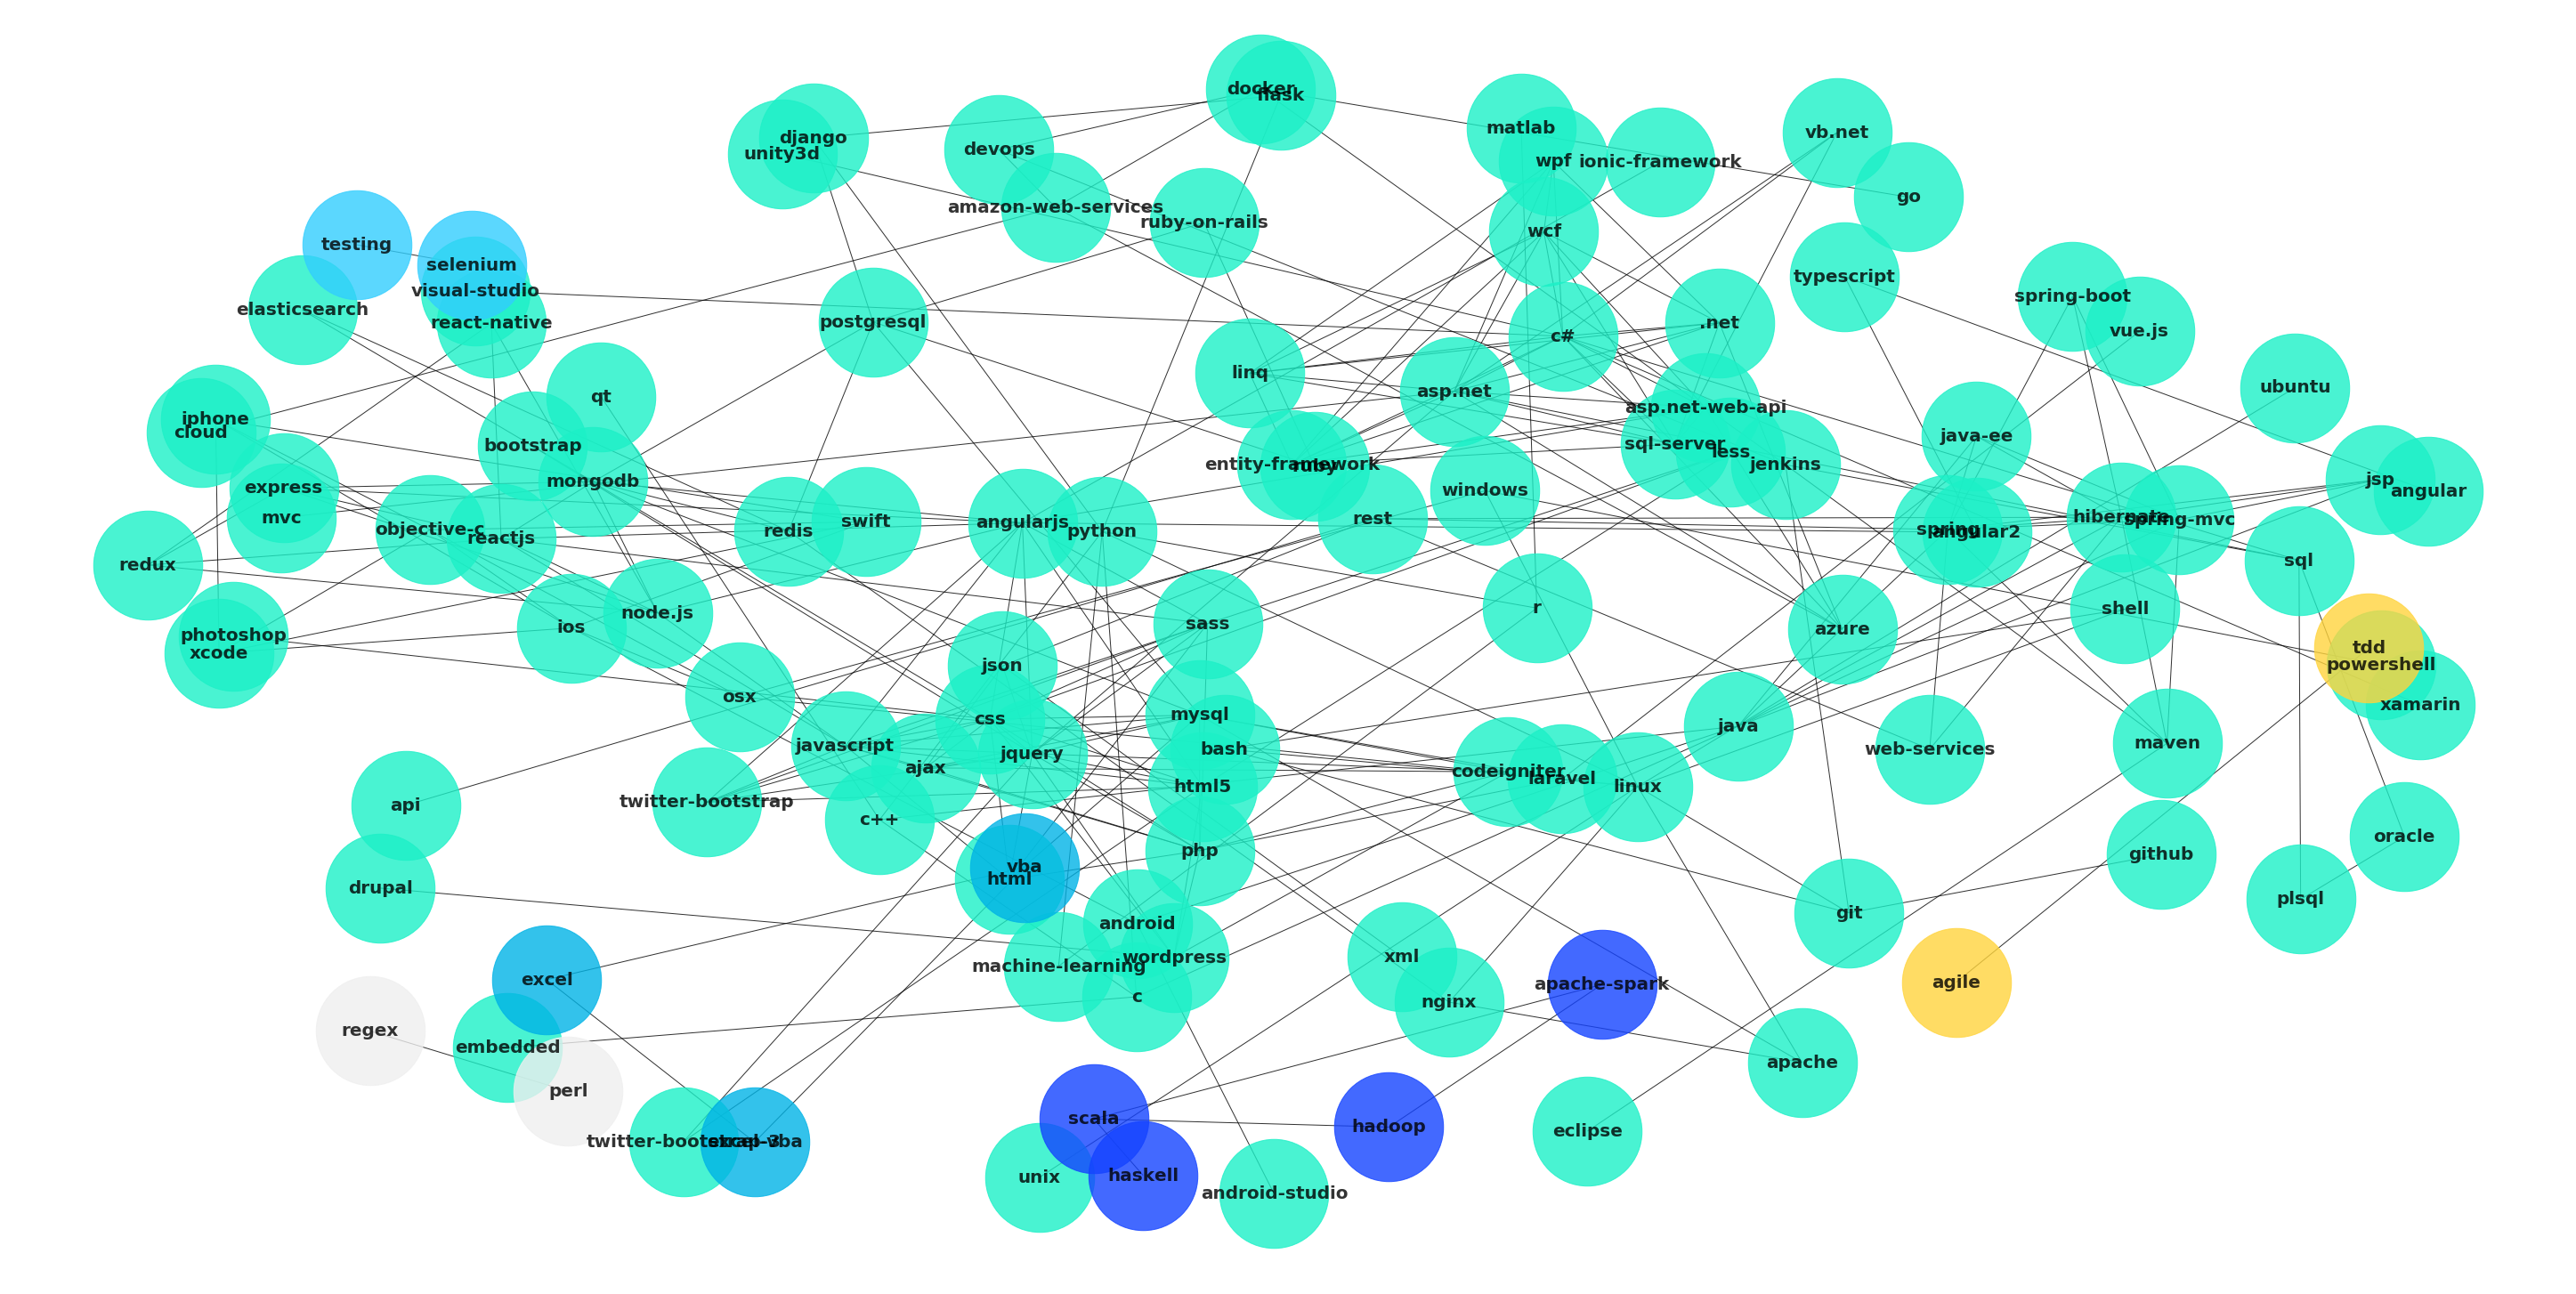

In [8]:
#Your code here
colors = [("teal","#1cf0c7"),
         ("workzone_yellow","#ffd43d"),
         ("light-blue","#00b3e6"),
         ("medium-blue","#32cefe"),
         ("gray","#efefef"),
         ("dark-blue", "#1443ff")]
color_dict = dict(colors)

kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=2))
fig = plt.figure(figsize=(40, 20))
for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True, node_color=colors[n][1], alpha=0.8, 
            node_size=15000, font_weight="bold", font_size=20)

## Perform an Alternative Clustering Using the Girvan-Newman Algorithm

Recluster the network using the Girvan-Newman algorithm. Remember that this will give you a list of cluster lists corresponding to the clusters that form from removing the top n edges according to some metric, typically edge betweenness.

In [9]:
# Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G))
for n, clusters in enumerate(gn_clusters):
    print("Clusters after removing {} edges: {}".format(n, len(clusters)))

Clusters after removing 0 edges: 7
Clusters after removing 1 edges: 8
Clusters after removing 2 edges: 9
Clusters after removing 3 edges: 10
Clusters after removing 4 edges: 11
Clusters after removing 5 edges: 12
Clusters after removing 6 edges: 13
Clusters after removing 7 edges: 14
Clusters after removing 8 edges: 15
Clusters after removing 9 edges: 16
Clusters after removing 10 edges: 17
Clusters after removing 11 edges: 18
Clusters after removing 12 edges: 19
Clusters after removing 13 edges: 20
Clusters after removing 14 edges: 21
Clusters after removing 15 edges: 22
Clusters after removing 16 edges: 23
Clusters after removing 17 edges: 24
Clusters after removing 18 edges: 25
Clusters after removing 19 edges: 26
Clusters after removing 20 edges: 27
Clusters after removing 21 edges: 28
Clusters after removing 22 edges: 29
Clusters after removing 23 edges: 30
Clusters after removing 24 edges: 31
Clusters after removing 25 edges: 32
Clusters after removing 26 edges: 33
Clusters after

## Create a Visualization Wrapper

Now that you have an idea of how splintered the network becomes based on the number of edges removed, you'll want to examine some of the subsequent groups that gradually break apart. Since the network is quiet complex to start with, using subplots is not a great option; each subplot would be too small to accurately read. Create a visualization function `plot_girvan_newman(G,clusters)` which takes a NetworkX graph object as well as one of the clusters from the output of the Girvan-Newman algorithm above and plots the network with a unique color for each cluster.

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

In [10]:
def plot_girvan_newman(G, clusters):
    #Your code here
    fig = plt.figure(figsize=(40, 20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
              "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
              "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
              "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
              "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
              "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
              "#80cdc1", "#35978f", "#01665e", "#003c30"]
    for n, c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G, k=2.66, seed=10), with_labels=True, node_color=colors[n], alpha=0.8, 
                node_size=15000, font_weight="bold", font_size=20)
    plt.show()

## Visualize the Various Clusters that Form Throughout the Girvan-Newman Algorithm

Use your function to visualize the various clusters that form throughout the Girvan-Newman algorithm as you remove more and more edges from the network.

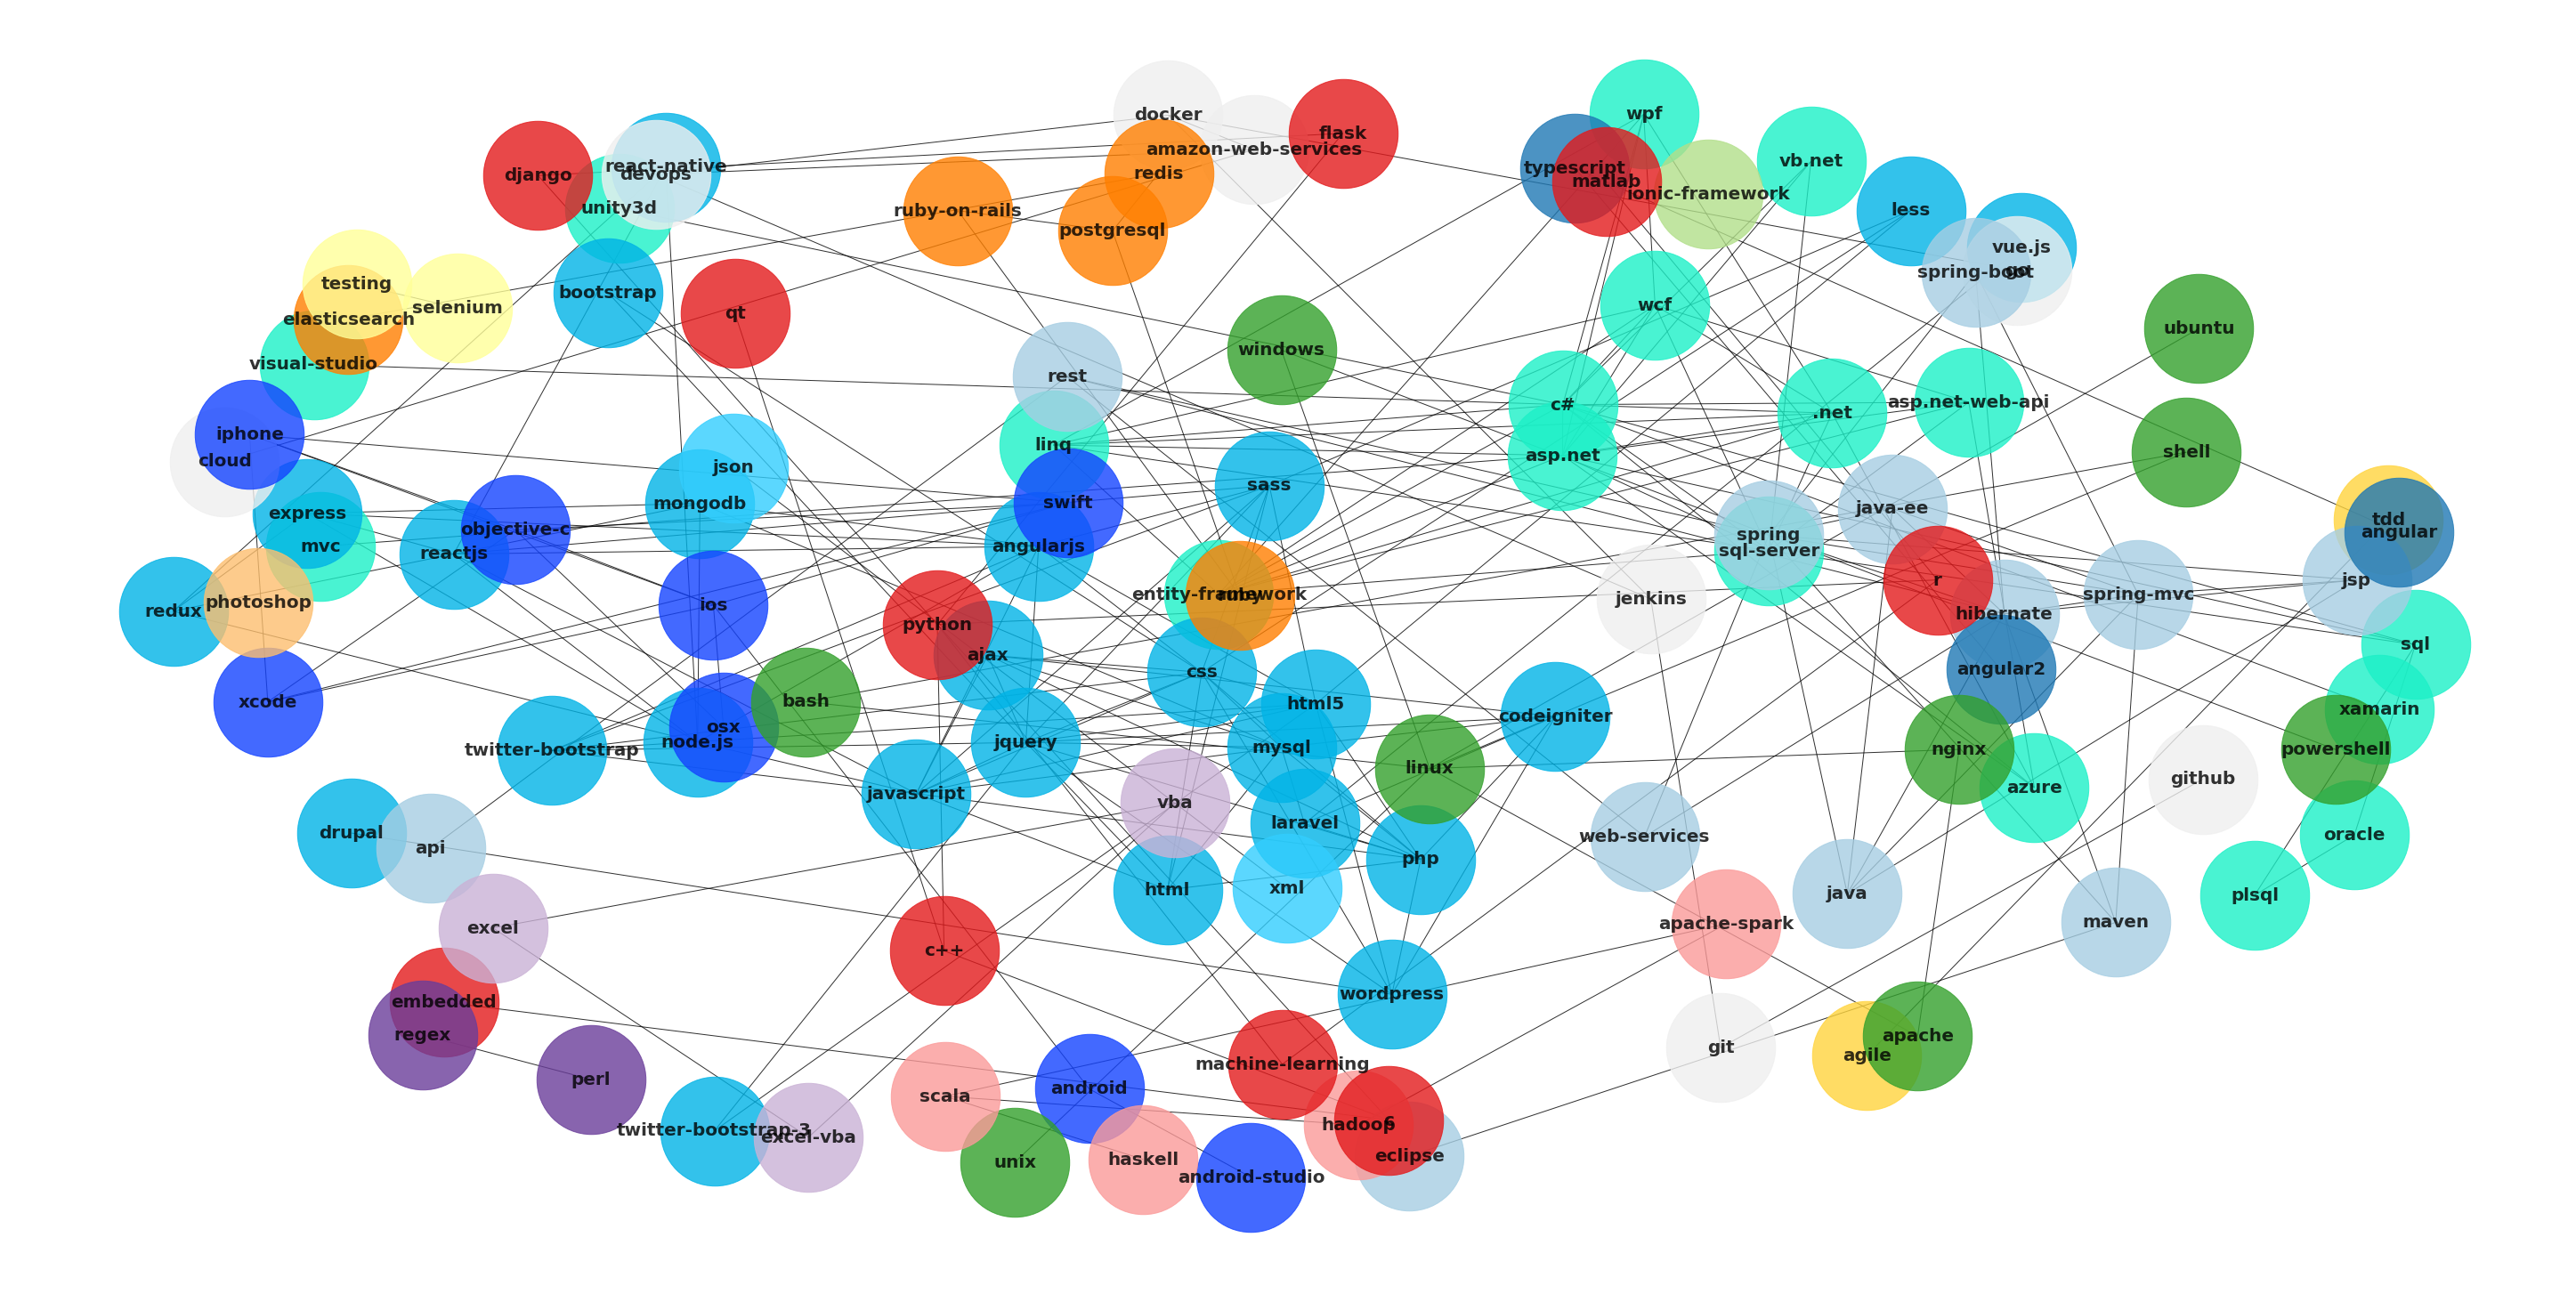

In [13]:
#Your code here
plot_girvan_newman(G, gn_clusters[10])

## Cluster Decay Rate

Create a visual to help yourself understand the rate at which clusters of this network formed versus the number of edges removed.

> **Level-Up**: Based on your graphic, what would you predict is an appropriate number of clusters? 

Text(0.5, 0, 'Number of Edges Removed')

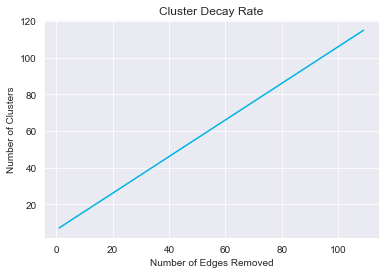

In [15]:
#Your code here
import seaborn as sns
sns.set_style('darkgrid')

x = [n+1 for n in range(len(gn_clusters))]
y = [len(cluster) for cluster in gn_clusters]
plt.plot(x, y, color="#00b3e6")
plt.title('Cluster Decay Rate')
plt.ylabel('Number of Clusters')
plt.xlabel('Number of Edges Removed')

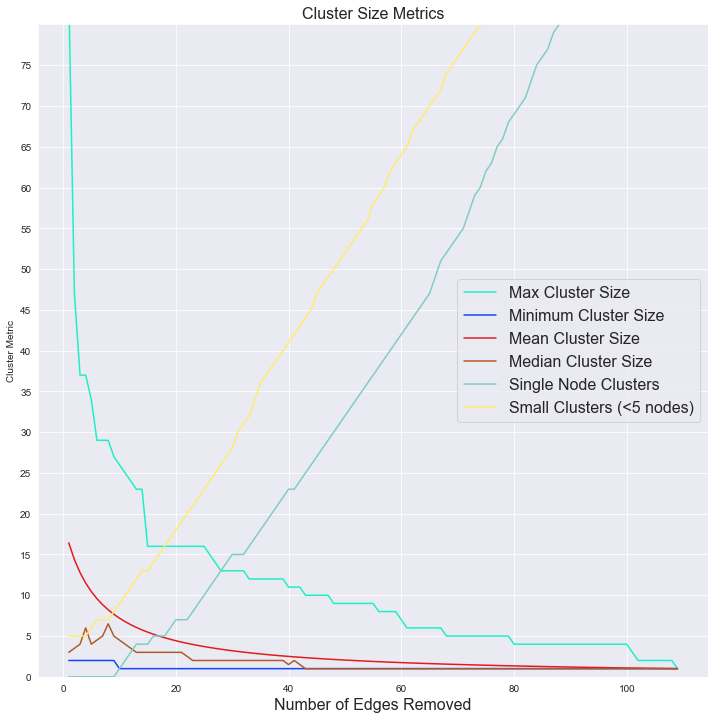

In [18]:
import numpy as np

colors =     ["#1cf0c7",
              "#1443ff",
              "#e31a1c",
              "#b15928",
              "#fdb462",
              "#ffed6f",
              "#80cdc1"]

fig = plt.figure(figsize=(12, 12))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, single_node_clusters, color=colors[6], label='Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, small_clusters, color=colors[5], label='Small Clusters (<5 nodes)')

plt.legend(fontsize=16)
plt.title('Cluster Size Metrics', fontsize=16)
plt.xlabel('Number of Edges Removed', fontsize=16)
plt.ylabel('Cluster Metric')
plt.ylim(0, 80)
plt.yticks(ticks=list(range(0, 80, 5)))
plt.show()

## Choose a Clustering 

Now that you have generated various clusters within the overall network, which do you think is the most appropriate or informative?

Edges Removed, Max Cluster Size, Difference in Max Cluster Size (from next row) 



[(1, 84, 37),
 (2, 47, 10),
 (3, 37, 0),
 (4, 37, 3),
 (5, 34, 5),
 (6, 29, 0),
 (7, 29, 0),
 (8, 29, 2),
 (9, 27, 1),
 (10, 26, 1),
 (11, 25, 1),
 (12, 24, 1),
 (13, 23, 0),
 (14, 23, 7),
 (15, 16, 0),
 (16, 16, 0),
 (17, 16, 0),
 (18, 16, 0),
 (19, 16, 0),
 (20, 16, 0),
 (21, 16, 0),
 (22, 16, 0),
 (23, 16, 0),
 (24, 16, 0),
 (25, 16, 1),
 (26, 15, 1),
 (27, 14, 1),
 (28, 13, 0),
 (29, 13, 0),
 (30, 13, 0)]

Number of clusters: 22


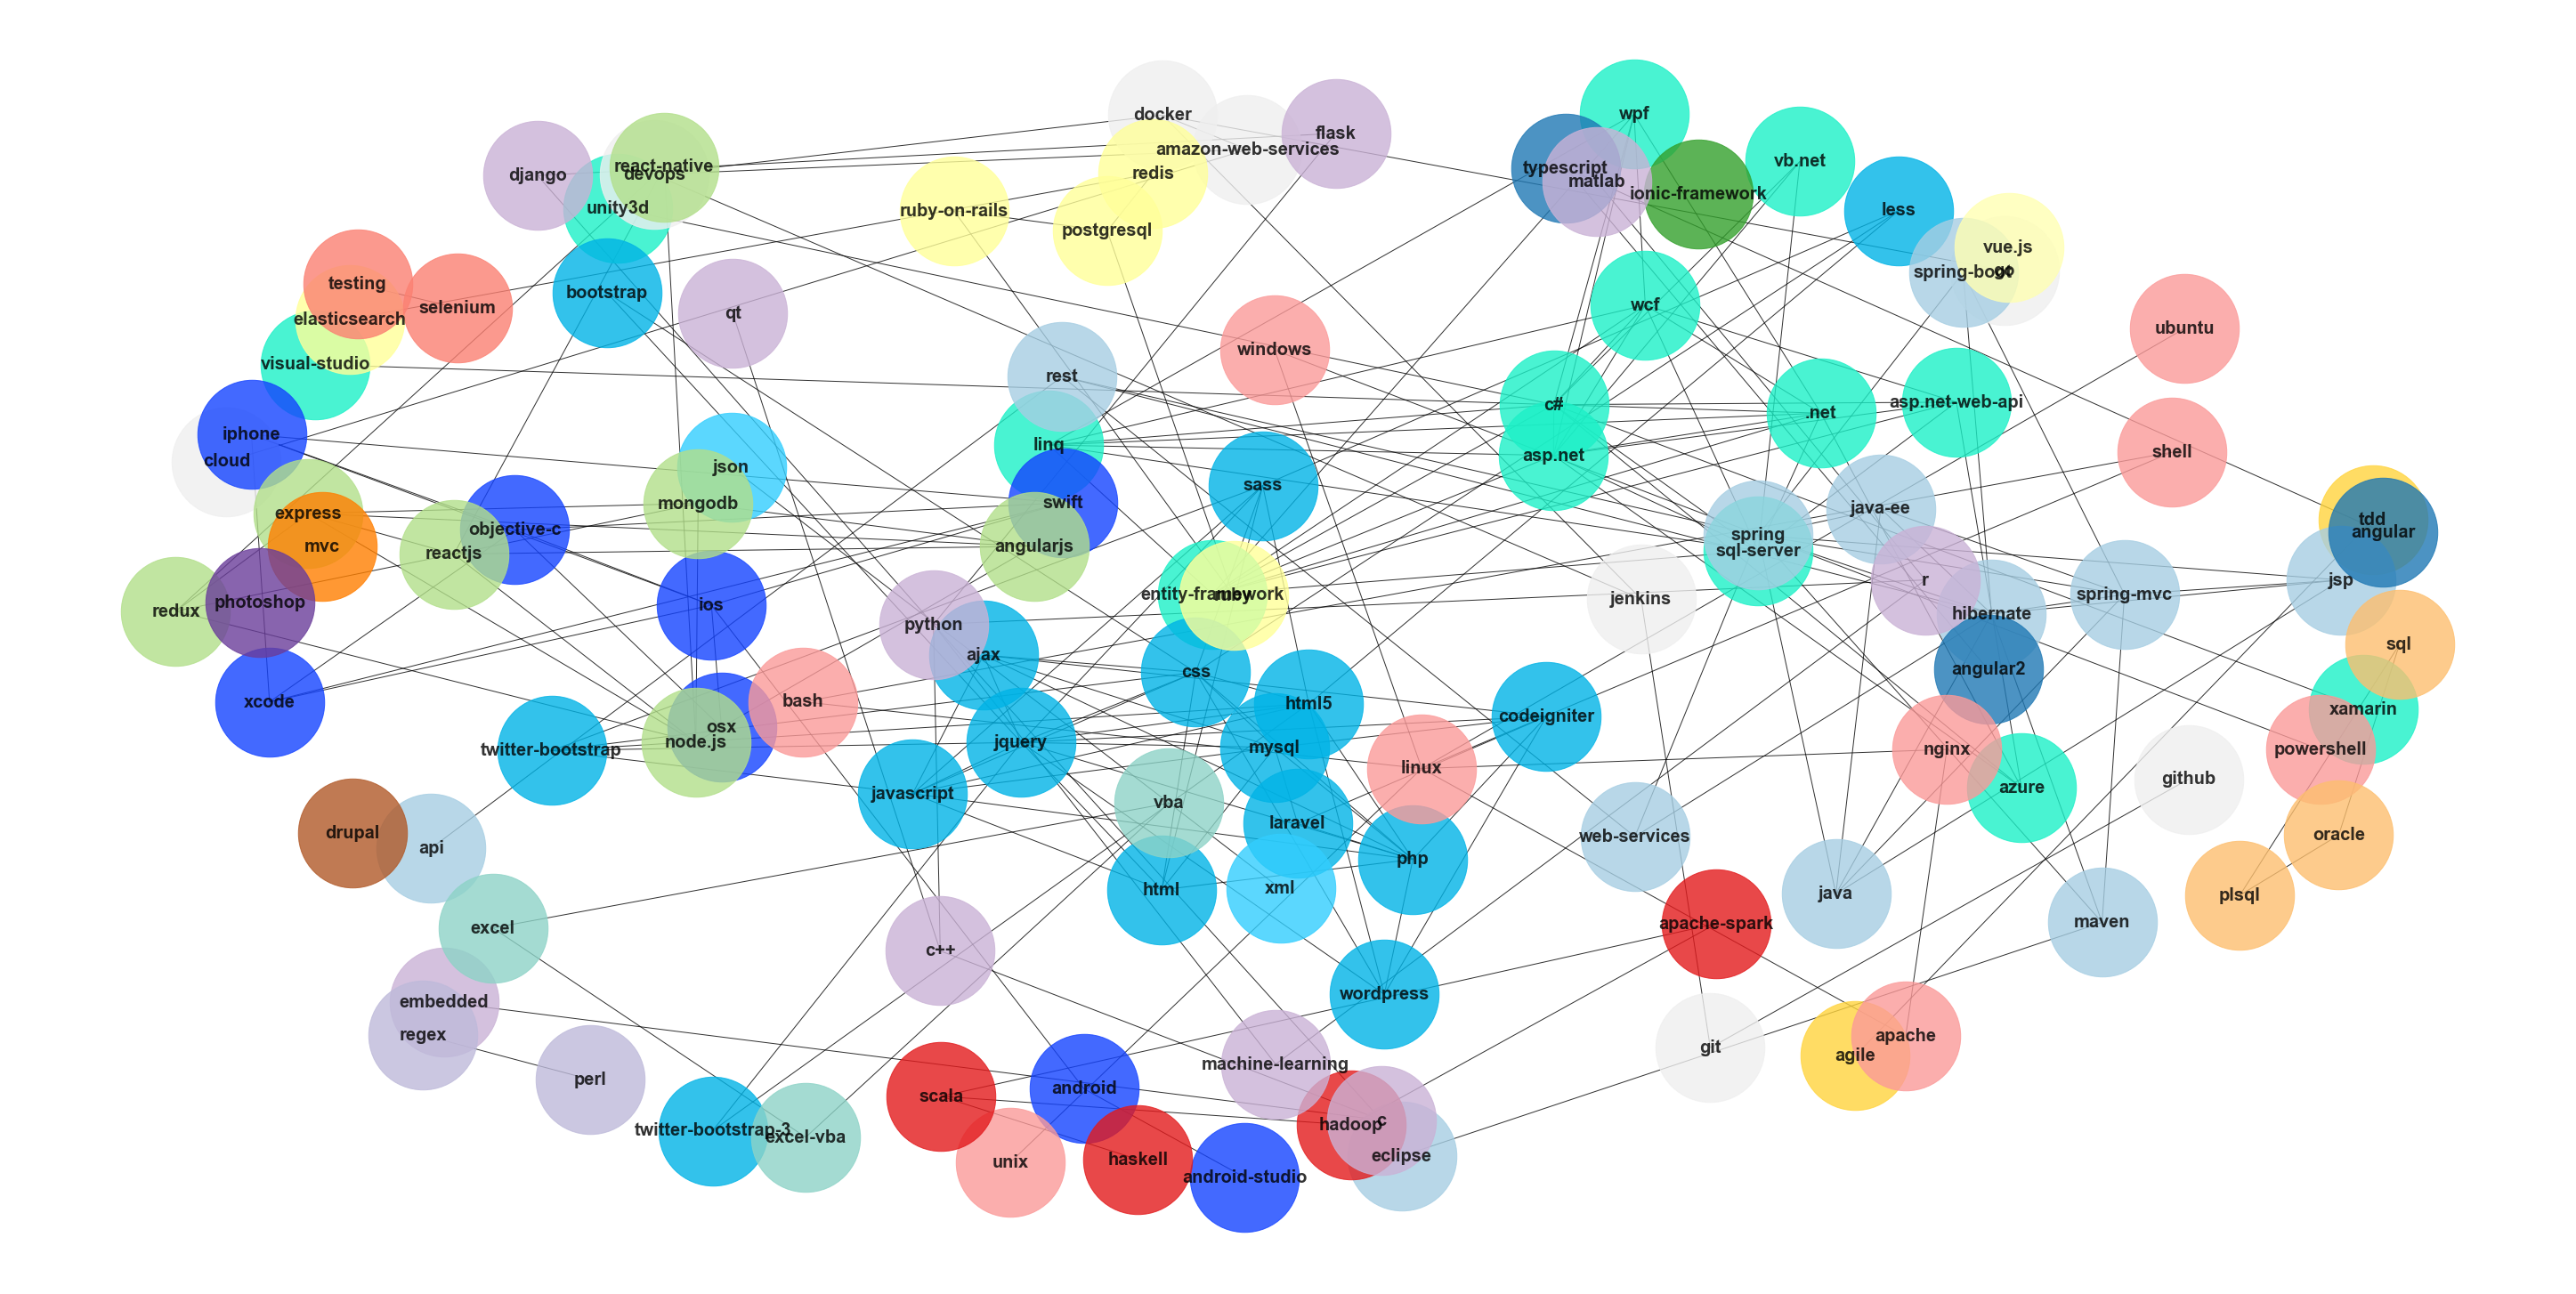

In [42]:
#Your code/response here
max_cluster_diff = [x-y for x, y in zip(max_cluster_size, max_cluster_size[1:])]
cluster_diff_list = list(zip(x, max_cluster_size, max_cluster_diff))
print('Edges Removed, Max Cluster Size, Difference in Max Cluster Size (from next row) \n')
display(cluster_diff_list[0:30])
print("Number of clusters:", len(gn_clusters[15]))
plot_girvan_newman(G, gn_clusters[15])

# The most appropriat and informative clustering network comes from removing 15 edges.
# After the 15th edge is removed, max cluster size does not drop again until the 25th edge is removed.
# This edge marks the beginning of a stable period for this metric, after which small and single node clusters
# start to greatly increase. 

## Summary

In this lab you practice using the k-clique and Girvan-Newman methods for clustering. Additionally, you may have also gotten a better sense of some of the current technological landscape. As you can start to see, network clustering provides you with powerful tools to further subset large networks into smaller constituencies allowing you to dig deeper into their particular characteristics.